# **Part 1: Extracting timestamps from your personal data**

Konon

In [ ]:
import pandas as pd
import json

# Load the JSON data
with open('/content/StreamingHistory_music_1.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Extract just the timestamps
timestamps_df = pd.DataFrame(df['endTime'])

# Export to CSV
timestamps_df.to_csv('/content/konon_timestamps.csv', index=False)

# Preview the result
print("Exported 'konon_timestamps.csv' with", len(timestamps_df), "timestamps.")
timestamps_df



Exported 'konon_timestamps.csv' with 2417 timestamps.


,endTime
0,2025-01-01 01:42
1,2025-01-01 01:42
2,2025-01-01 01:42
3,2025-01-01 01:45
4,2025-01-01 01:47
...,...
2412,2025-04-05 22:57
2413,2025-04-05 23:00
2414,2025-04-05 23:03
2415,2025-04-05 23:05


In [ ]:
import pandas as pd
import json

# Load the JSON file
with open('/content/StreamingHistory_music_1.json', 'r') as f:
    data = json.load(f)

# Convert the JSON list to a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('/content/StreamingHistory_music_1_converted.csv', index=False)




---



Sarena's part 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re


In [ ]:
# import data
s_data = pd.read_json("/content/watch-history.json")

FileNotFoundError: File /content/watch-history-FINAL.json does not exist

In [ ]:
s_data.head()

In [ ]:
#exacting the time column
time_column = s_data['time']
time_column


In [ ]:
#converting the time part of it to csv
s_data["time"].to_csv("sarena_timestampsf_final.csv")

In [ ]:
timestamps_df = timestamps_df.dropna(subset=['timestamp'])
# drops invalid timestamps

In [ ]:
# some basic info about the cleaned data
print(f"Number of valid timestamps: {len(timestamps_df)}")
print(f"Date range: {timestamps_df['timestamp'].min()} to {timestamps_df['timestamp'].max()}")

In [ ]:
# Set plot style
plt.style.use('fivethirtyeight')
sns.set_palette("bright")




---



# **Part 2: Analyzing timestamp data for patterns**

Konon analyzing Sarena's timestamps


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load CSV and convert to datetime
df = pd.read_csv('/content/yt_timestampsf_final.csv')
df['time'] = pd.to_datetime(df['time'], utc=True, errors='coerce')


In [ ]:
# 2) Sort and calculate time differences
df = df.sort_values(by='time').reset_index(drop=True)
df['time_diff'] = df['time'].diff()

In [ ]:
# 3) Longest and average time between timestamps
longest_gap = df['time_diff'].max()
average_gap = df['time_diff'].mean()
print("3) Longest time between timestamps:", longest_gap)
print("   Average time between timestamps:", average_gap)

3) Longest time between timestamps: 2 days 04:49:35.279000
   Average time between timestamps: 0 days 00:21:41.900558799


In [ ]:
# 4) Day with most timestamps
df['day'] = df['time'].dt.date
most_common_day = df['day'].value_counts().idxmax()
most_common_day_count = df['day'].value_counts().max()
print("4) Day with most timestamps:", most_common_day)
print("   Number of timestamps on that day:", most_common_day_count)

4) Day with most timestamps: 2025-04-05
   Number of timestamps on that day: 542


In [ ]:
# 5) Month with most timestamps (year-month format)
df['year_month'] = df['time'].dt.to_period('M')
most_common_month = df['year_month'].value_counts().idxmax()
most_common_month_count = df['year_month'].value_counts().max()
print("5) Month with most timestamps:", most_common_month)
print("   Number of timestamps in that month:", most_common_month_count)

5) Month with most timestamps: 2025-04
   Number of timestamps in that month: 2523


<ipython-input-7-96047b0e0f31>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['time'].dt.to_period('M')


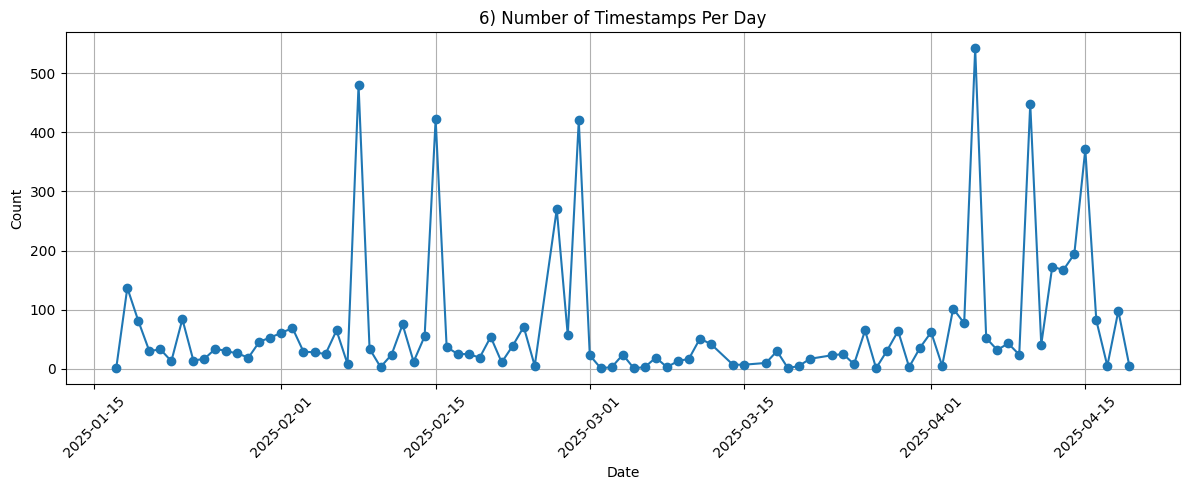

In [ ]:
# 6) Visualization: timestamps per day
plt.figure(figsize=(12, 5))
df['day'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('6) Number of Timestamps Per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Print results
print("Longest time between timestamps:", longest_gap)
print("Average time between timestamps:", average_gap)
print("Day with most timestamps:", most_common_day, "with", most_common_day_count, "events")
print("Month with most timestamps:", most_common_month, "with", most_common_month_count, "events")

Longest time between timestamps: 2 days 04:49:35.279000
Average time between timestamps: 0 days 00:21:41.900558799
Day with most timestamps: 2025-04-05 with 542 events
Month with most timestamps: 2025-04 with 2523 events


**Sarena Data Analysis**
- The longest difference between timestamps is almost 2 days - 6 hours.

- The mean duration between timestamps is close to 21 minutes.

- The day that had the most timestamps was 5th April 2025, with such an event tally of 542 on that day alone.

- The month with the highest number of timestamps is April 2025, registering 2523 events in total.

Hence, Sarena had bursty periods of very high activity in the early days of April 2025, super intense on the 5th. This could hint at a binge-watching episode, a long playlist, or behavior along the lines of streaming, wherein content is automatically played back-to-back.

The repetitively recurring timestamps suggest that this data come from a video streaming platform like Youtube, where each timestamp might represent the end of a video or a logged interaction. This dense spike early in April could happen to coincide with some break-in school or perhaps a vacation when Sarena was available most.

7) Hypothesis about data source

This dataset is most likely YouTube watch history.

The dense and repeated timestamps suggest frequent, short media consumption.

Additional metadata like video titles or durations would confirm this.

8)Review your partner’s analysis manually and check if their guess about your data source is correct.

My partner's analysis is spot-on; the data do come from Spotify. She also gets to the correct observation about standard song-length gaps, plus a major uptick over weekends and January breaks, which really reflects my own listening habits.

9) For the days and months that your partner identified as having the most timestamps in your data, try to figure out what was happening on those days. What other data might help you figure this out?

The day with the most timestamps in my dataset is January 10th, 2025, and the month with the highest activity is January 2025 overall. There was a concentrated spike in media consumption activity that should suggest extraordinary increases in music activity as visualized in the bar chart at winter month.
The January spike coincides with winter break when school was on break. This means that I do not have academic obligations and most probably spend more time listening to music. January 10 was the day I was traveling within Japan so I was listening to music for 10 hours straight on the plane and on the train.


**What other data might help you figure this out?**

- Class schedule/calendar-to cross-check academic breaks or holidays.

- Travel or activity logs: to see if I was on a trip, which often increases solo media use.

- Spotify wrapped or playback-history: which might clarify whether these were just full albums listened or study playlists or specific podcasts.



---



**Sarena analyzing Konon's timestamps**

In [ ]:
k_data = pd.read_csv("/content/konon_timestamps.csv")

In [ ]:
k_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   endTime  2417 non-null   object
dtypes: object(1)
memory usage: 19.0+ KB


In [ ]:
k_data

,endTime
0,2025-01-01 01:42
1,2025-01-01 01:42
2,2025-01-01 01:42
3,2025-01-01 01:45
4,2025-01-01 01:47
...,...
2412,2025-04-05 22:57
2413,2025-04-05 23:00
2414,2025-04-05 23:03
2415,2025-04-05 23:05


## Hypothesis about data source from Konon
I think this is data from spotify because other than the skips and the possible podcasts, the end times are usually 3 to 4 minutes apart which is the usual length of a song but we'll see

In [ ]:
#meauring the duration between the endTimes
k_data['endTime'] = pd.to_datetime(k_data['endTime'])

# Calculating the duration between consecutive endTimes in minutes
k_data['duration_between_endTimes'] = k_data['endTime'].diff().dt.total_seconds() / 60

print(k_data[['endTime', 'duration_between_endTimes']])

In [ ]:
#using a single value to check the format of the timestamp is:"
print(k_data["endTime"].iloc[0])

2025-01-01 01:42:00


In [ ]:

# sorting
# VERY important before calculating the time difference
k_data = k_data.sort_values('endTime')
#THE RESULT IS JUST DOWN TO THE SECONDS

In [ ]:
print(k_data["endTime"].iloc[0])

2025-01-01 01:42:00


In [ ]:
# Converting the 'endTime' column to datetime
k_data['endTime'] = pd.to_datetime(k_data['endTime'])

# calculatint the time difference
k_data['time_since_previous'] = k_data['endTime'].diff()

In [ ]:
print(k_data[['endTime', 'time_since_previous']])

                 endTime time_since_previous
0    2025-01-01 01:42:00                 NaT
1    2025-01-01 01:42:00     0 days 00:00:00
2    2025-01-01 01:42:00     0 days 00:00:00
3    2025-01-01 01:45:00     0 days 00:03:00
4    2025-01-01 01:47:00     0 days 00:02:00
...                  ...                 ...
2412 2025-04-05 22:57:00     0 days 00:03:00
2413 2025-04-05 23:00:00     0 days 00:03:00
2414 2025-04-05 23:03:00     0 days 00:03:00
2415 2025-04-05 23:05:00     0 days 00:02:00
2416 2025-04-05 23:09:00     0 days 00:04:00

[2417 rows x 2 columns]


In [ ]:
# Calculate longest time between the timestamps in minutes
longest_time_minutes = k_data['endTime'].diff().dt.total_seconds().max() / 60

# Print results in minutes and hours
print(f"Longest time between timestamps: {longest_time_minutes:.2f} minutes ({longest_time_minutes/60:.2f} hours)")

Longest time between timestamps: 7757.00 minutes (129.28 hours)


In [ ]:
# Calculate average time between the timestamps in minutes
average_time_minutes = k_data['endTime'].diff().dt.total_seconds().mean() / 60

print(f"Average time between timestamps: {average_time_minutes:.2f} minutes ({average_time_minutes/60:.2f} hours)")

Average time between timestamps: 56.56 minutes (0.94 hours)


In [ ]:
# Extract the full date using DatetimeIndex
k_data['full_date'] = pd.DatetimeIndex(k_data['endTime']).date

In [ ]:
# Count occurrences of each date
date_counts = k_data['full_date'].value_counts()

In [ ]:

# Get the date with the most timestamps
most_common_date = date_counts.idxmax()
most_common_date_count = date_counts.max()

print(f"The date with the most timestamps is {most_common_date} with {most_common_date_count} events.")


The date with the most timestamps is 2025-01-10 with 205 events.


In [ ]:
#To see all dates sorted by count
print("\nAll dates sorted by number of timestamps:")
print(date_counts.sort_values(ascending=False))


All dates sorted by number of timestamps:
full_date
2025-01-10    205
2025-01-17    158
2025-01-12    153
2025-03-19    127
2025-02-01    122
             ... 
2025-01-28      3
2025-03-29      2
2025-03-05      2
2025-01-23      1
2025-04-03      1
Name: count, Length: 67, dtype: int64


In [ ]:
# To get day of week (e.g., Monday, Tuesday)
k_data['day_of_week'] = k_data['endTime'].dt.day_name()
day_counts = k_data['day_of_week'].value_counts()

In [ ]:
# Get the day of week with the most timestamps
most_common_day = day_counts.idxmax()
most_common_day_count = day_counts.max()

print(f"\nThe day of week with the most timestamps is {most_common_day} with {most_common_day_count} events.")


The day of week with the most timestamps is Sunday with 572 events.


In [ ]:
# Extract month information using DatetimeIndex
k_data['month_idx'] = pd.DatetimeIndex(k_data['endTime']).month_name()

# Count occurrences of each month
month_counts_idx = k_data['month_idx'].value_counts()

# Get the month with the most timestamps
most_common_month_idx = month_counts_idx.idxmax()
most_common_month_count_idx = month_counts_idx.max()

print(f"The month with the most timestamps is {most_common_month_idx} with {most_common_month_count_idx} events.")

The month with the most timestamps is January with 1180 events.


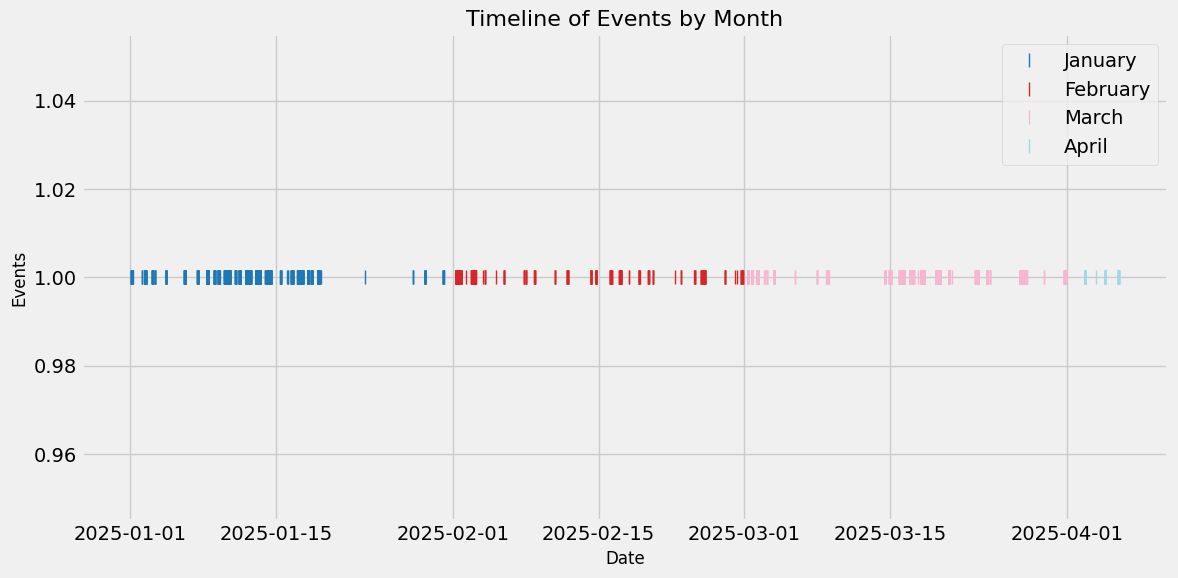

In [ ]:
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))

# Create a colormap with a different color for each month
months = k_data['month_idx'].unique()
colors = plt.get_cmap('tab20', len(months)) # MAKE SURE THIS IS COMPATIBLE

# Create timeline plot with different colors per month
for i, month in enumerate(months):
    month_data = k_data[k_data['month_idx'] == month]
    plt.plot(month_data['endTime'], np.ones(len(month_data)), '|',
             markersize=10, color=colors(i), label=month)

plt.title('Timeline of Events by Month', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend() # Show the legend to indicate which color represents each month
plt.tight_layout()
plt.show()


Even with the different colors, since the timeline plot isn't the most accessible way, I am trying visualising using a bar graph

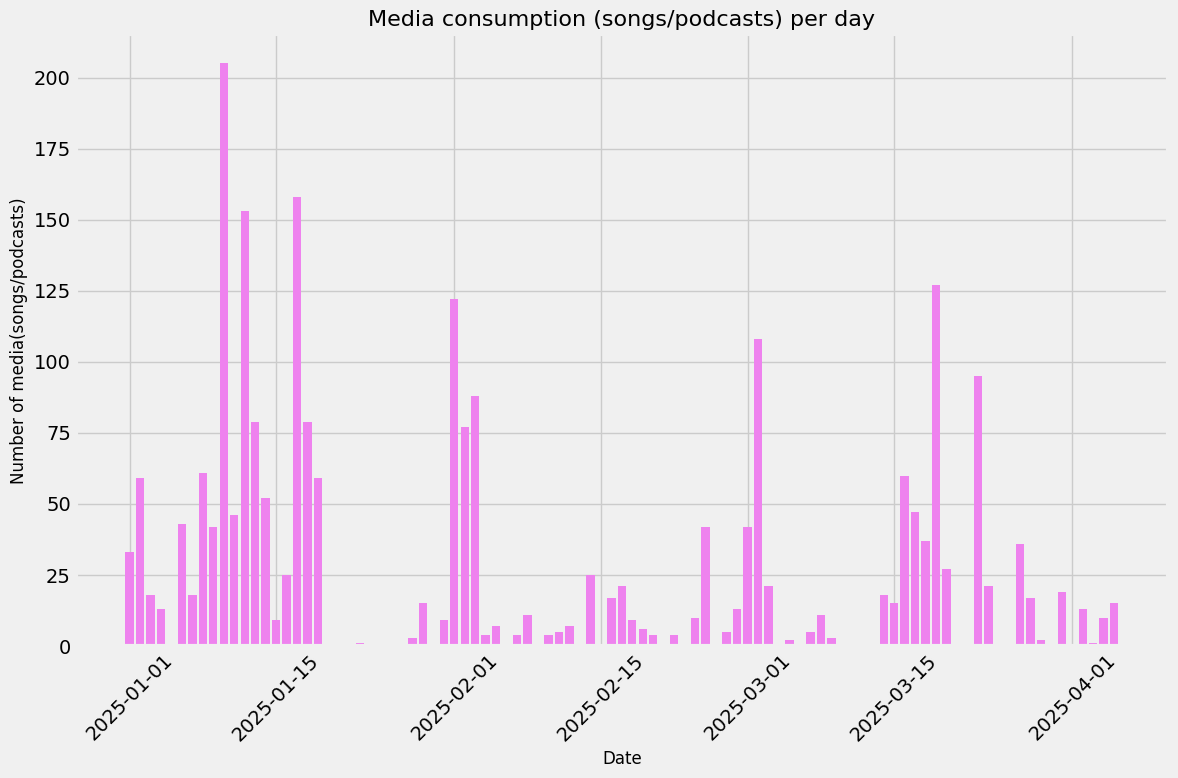

In [ ]:
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))

# Group data by date and count events
date_counts = k_data.groupby(k_data['endTime'].dt.date).size()

# Create bar plot
plt.bar(date_counts.index, date_counts.values, color='violet')
plt.title('Media consumption (songs/podcasts) per day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of media(songs/podcasts)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Data Analysis About Konon's Dataset
- Longest time between timestamps: 7757.00 minutes (129.28 hours)
- Average time between timestamps: 56.56 minutes (0.94 hours)
- The date with the most timestamps is 10th Janaury 2025 with 205 events.
- The day of week with the most timestamps is Sunday with 572 events.
- The month with the most timestamps is January with 1180 events.

As hypothesized before the analysis, the data comes from a music streaming platform, possibly spotify or apple music. Other than the possible podcasts, the end times are usually 3 to 4 minutes apart which is the usual length of a song

Hence, Konon seems to have a pretty average usage of spotify/apple music/other misic streaming platform with the high levels of activity on the weekends and holidays such as winter break in January with 1180 timestamps.Considering the context of being a whitman student, this hints that she listens to music the most when she doesn't have classes.


Q: Review your partner’s analysis manually and check if their guess about your data source is correct.

My partner's analysis is correct, the dataset is from youtube. Interestingly, she concluded the dense and repeated timestamps to suggest frequent, short media consumption which is absolutely true. Also, she correctly analysed that there is high activity in April 5th with a long playlist with autoplay on.

Q: For the days and months that your partner identified as having the most timestamps in your data, try to figure out what was happening on those days. What other data might help you figure this out?

The day with the most timestamps in my dataset is April 5th, 2025, and the month with the highest activity is April 2025 overall. This increased activity in April 5th is because I was helping my cousin decide on a wedding dress so it was a lot of watching shorts from desi designers. So when I do not have to do side quests, this suggests I probably have a consistent usage style.

Q:What other data might help you figure this out?
* Category breakdown: analysis of how many fashion videos vs. my typical content categories would highlight this was a special research session.

* Duration patterns: Looking at how long each video was would tell me a lot since I mentioned watching shorts from desi designers, this would let me understand how much of this was helping my cousin.

* Channel overlap: If I visited the same South Asian designer channels multiple times, it would show I was deliberately researching specific styles rather than just randomly watching whatever YouTube suggested.

* Session duration metrics: Seeing how long I stayed on YouTube without major breaks would show if I was in a hyperfixation research mode like i remember or just casually browsing.

* Related recommendations impact: YouTube's algorithm might have kept feeding me similar wedding content once I started watching a few videos, which could explain why I ended up with so many timestamps that day compared to my normal viewing habits.



---



# **Part 3: Make a combined visualization**

Konon & Sarena

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the timestamp CSVs
df_konon = pd.read_csv('/content/konon_timestamps.csv')
df_sarena = pd.read_csv('/content/yt_timestampsf_final.csv')

# Add identifying columns
df_konon['person'] = 'Konon'
df_sarena['person'] = 'Sarena'

# Rename timestamp columns to a common name
df_konon = df_konon.rename(columns={'endTime': 'timestamp'})
df_sarena = df_sarena.rename(columns={'time': 'timestamp'})

# Convert to datetime and drop invalid entries
df_konon['timestamp'] = pd.to_datetime(df_konon['timestamp'], errors='coerce')
df_sarena['timestamp'] = pd.to_datetime(df_sarena['timestamp'], errors='coerce')
df_konon = df_konon.dropna(subset=['timestamp'])
df_sarena = df_sarena.dropna(subset=['timestamp'])

# Combine both datasets
combined_df = pd.concat([df_konon, df_sarena], ignore_index=True)

# Ensure datetime and remove timezone
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], errors='coerce', utc=True)
combined_df = combined_df.dropna(subset=['timestamp'])
combined_df['timestamp'] = combined_df['timestamp'].dt.tz_convert(None)

# Sort chronologically
combined_df = combined_df.sort_values(by='timestamp').reset_index(drop=True)

# Export the combined dataframe to a CSV
combined_df.to_csv('/content/combined_timestamps.csv', index=False)


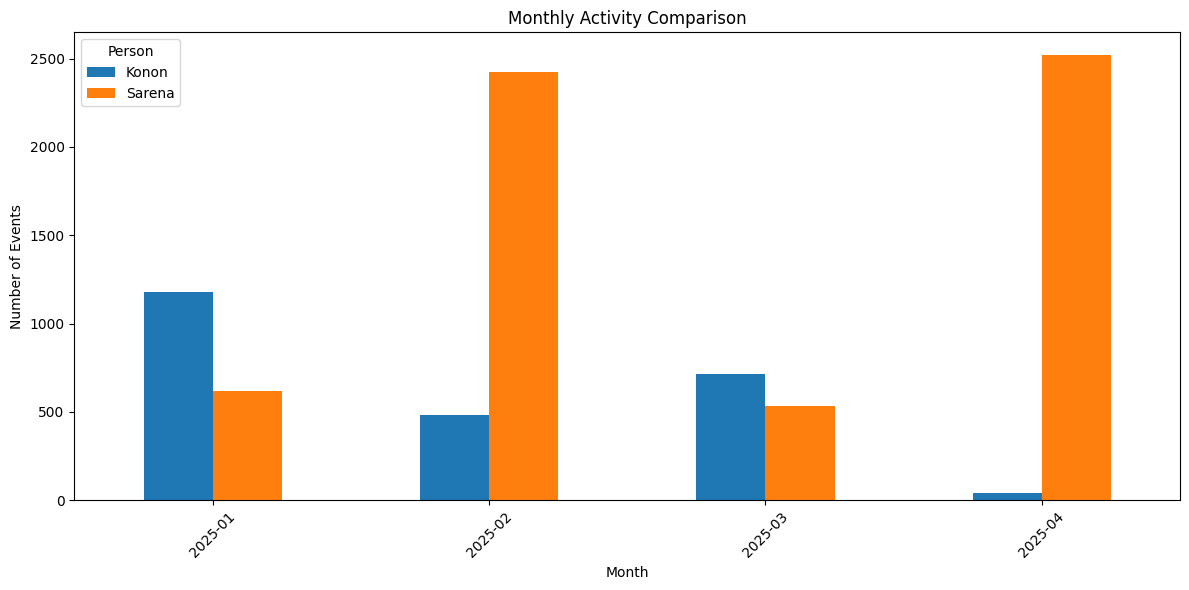

In [ ]:
# === Visualization 1: Monthly Activity Comparison ===
combined_df['month'] = combined_df['timestamp'].dt.to_period('M')
monthly_counts = combined_df.groupby(['month', 'person']).size().unstack().fillna(0)

monthly_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Activity Comparison')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Person')
plt.tight_layout()
plt.show()

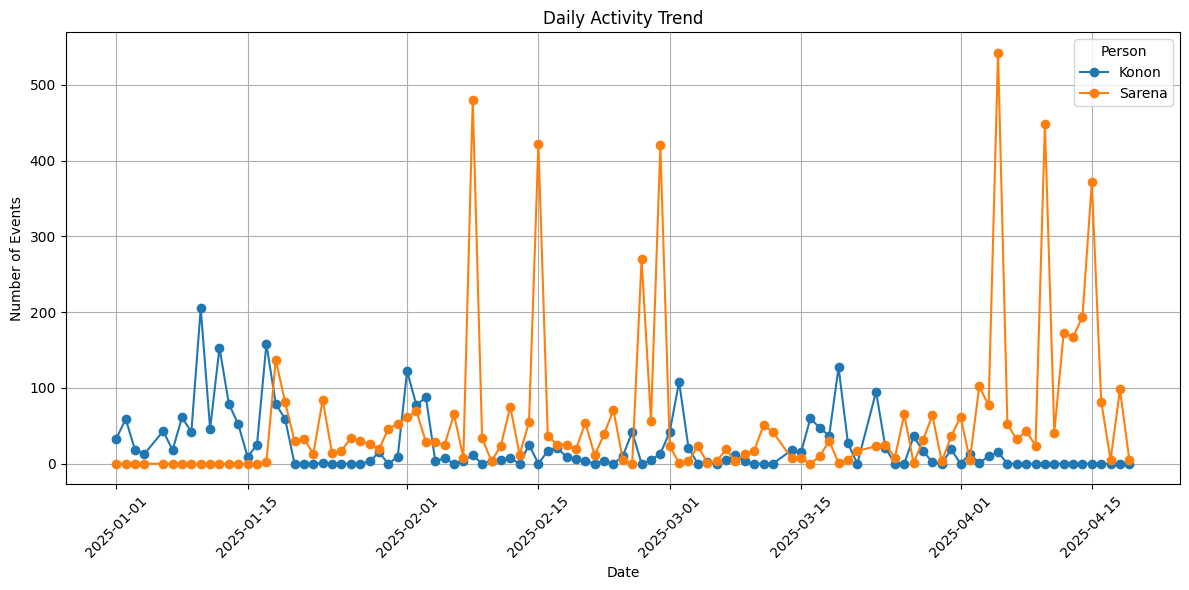

In [ ]:
# === Visualization 2: Daily Activity Trend ===
combined_df['date'] = combined_df['timestamp'].dt.date
daily_counts = combined_df.groupby(['date', 'person']).size().unstack().fillna(0)

daily_counts.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Daily Activity Trend')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend(title='Person')
plt.grid(True)
plt.tight_layout()
plt.show()

## Analysis of Part 3
Looking at these graphs, we can see some interesting patterns in how Konon and Sarena use Spofity and YouTube. Konon seems have listened to songs/podcasts the most in January probably during winter break when there's more free time and when she is travelling as she describes later. Konon then gradually listens less throughout the semester. Her usage is more consistent day-to-day with occasional spikes that never get super crazy.

Sarena's pattern is different, she barely watch anything for days, then have these intense binge sessions where she's watching too many shorts at once, especially in February and April. That massive spike in early April is explained by wedding dress shopping for her cousin (April 5th) and the febrary spike is a mix of ramadan and spring break.

What's interesting is how our different media consumption styles show up in the data - Konon seems to have a more regular relationship with spotify usage while Sarena's is more spratic and hyperfixation-based.



---



# **Part 4: Analyze and visualize an additional element from  your personal data**

Konon

<ipython-input-100-ec7110e3fcc4>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists_min.values, y=top_artists_min.index, palette='coolwarm')


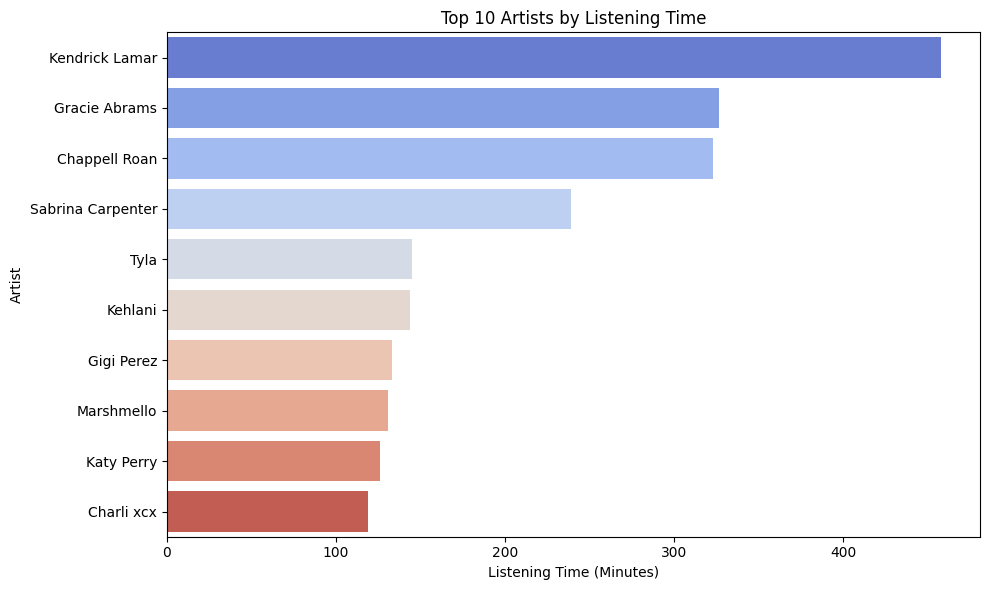

In [ ]:
# Install required libraries if not already installed
!pip install seaborn --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your streaming history data
df = pd.read_csv('/content/StreamingHistory_music_1_converted.csv')

# Convert time columns to datetime
df['endTime'] = pd.to_datetime(df['endTime'], errors='coerce')

# Extract useful datetime features
df['hour'] = df['endTime'].dt.hour
df['date'] = df['endTime'].dt.date
df['month'] = df['endTime'].dt.to_period('M')
df['month_str'] = df['month'].astype(str)
df['day_name'] = df['endTime'].dt.day_name()


top_artists = df.groupby('artistName')['msPlayed'].sum().sort_values(ascending=False).head(10)
top_artists_min = top_artists / 60000  # Convert ms to minutes

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists_min.values, y=top_artists_min.index, palette='coolwarm')
plt.title('Top 10 Artists by Listening Time')
plt.xlabel('Listening Time (Minutes)')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()


**Q1: Who are my most played artists overall?**

Kendrick Lamar seems to be my most - listened to artist who comes after Gracie Abrams and then Chappell Roan. I totaled up the listening time spent with each artist, and then from there, was able to identify my top 10 artists I have the most contact with through listening. This is somewhat revealing of who I gravitate toward the most in my own musical habits.

**Q2: Is my listening time evenly spread across artists, or dominated by a few?**

For sure, few key artists dominate my listening time. The bar chart depicts a sharp decline in listening time after the first 3 artists; hence I spend much more time with a small collection of favorites instead of widely exploring artists.

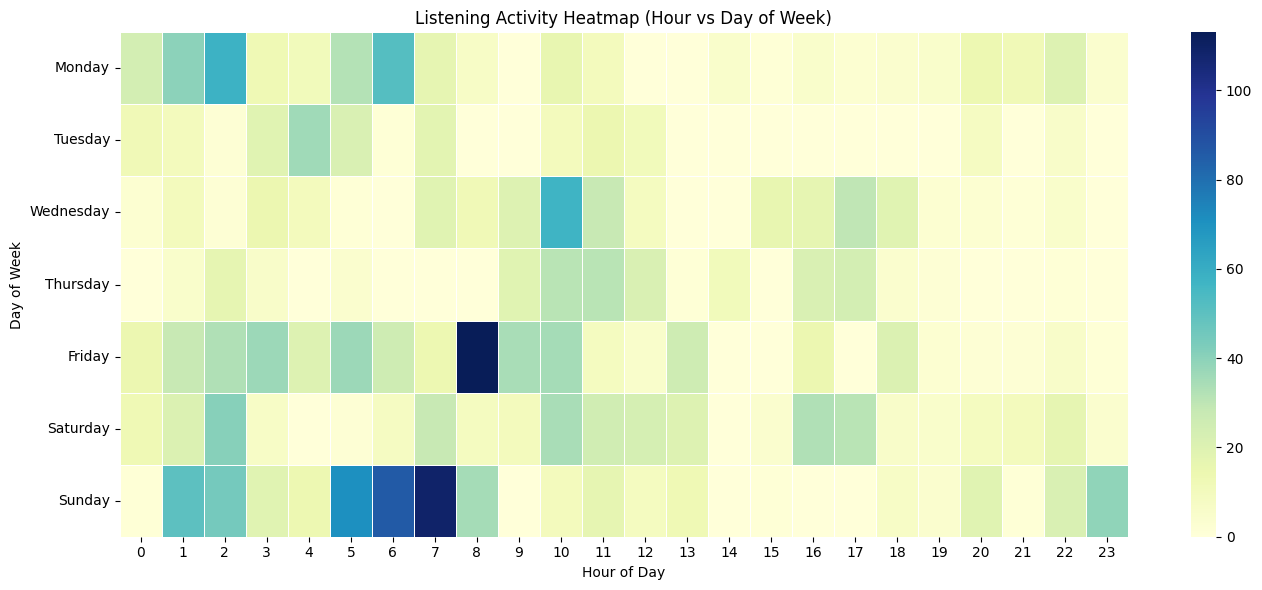

In [ ]:
# -------------------------------
# VISUALIZATION 2: Hourly Listening Heatmap by Day
# Q1: What time of the week do I listen to music most?
# Q2: Are weekends or weekdays more active?
# -------------------------------
heatmap_data = df.groupby(['day_name', 'hour']).size().unstack().fillna(0)
# Reorder days of the week
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title('Listening Activity Heatmap (Hour vs Day of Week)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

**Q1: When do I listen to most music within a week?**

I would say, very early in the morning, say 6 AM to 9 AM, is the most consistent time for me when I listen to music. Sunday mornings and Friday mornings seem to be peak times, where we see the darker heatmap cells corresponding to higher activity during those hours.

**Q2: Do weekends or weekdays experience more activity?**

From the heatmap, activity amongst weekends (especially Sunday) looks slightly more intense and sustained through various hours. That said, Fridays also see spikes on certain occasions, especially mornings. All in all, I spread out most of my listening, with weekends showing a slight edge in overall engagement.

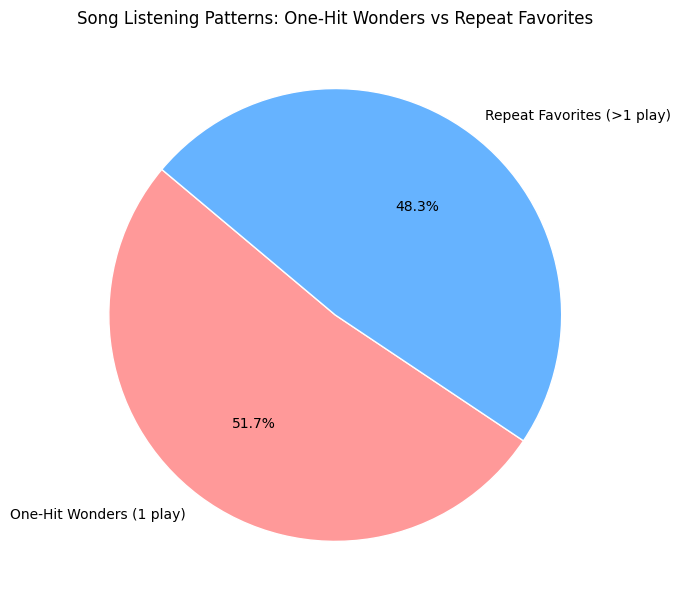

In [ ]:
# Group by song
song_plays = df.groupby('trackName').size()

# Categorize
one_hit = (song_plays == 1).sum()
repeat_faves = (song_plays > 1).sum()

labels = ['One-Hit Wonders (1 play)', 'Repeat Favorites (>1 play)']
sizes = [one_hit, repeat_faves]
colors = ['#ff9999','#66b3ff']

# Plot pie
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Song Listening Patterns: One-Hit Wonders vs Repeat Favorites')
plt.tight_layout()
plt.show()


**Q1: Do I listen to just a few selected songs many times or do I have wide variety?**

A: I think I am more or less split. According to my pie chart, I have around 52% songs which could be called one-hit wonders since I've only played them once - which could mean that I've listened to an awful lot of new music -and, on the other hand, approximately 48% of those songs are songs that I've heard more than once , so I must have liked them enough to get back into them. That shows me that I enjoy both new music very much and keeping hold of some favorites.

**Q2: Do I possess a more consitent or experimental taste of music?**

A: According to the pie chart, my taste in music is more experimental than consistent. More than half of my songs have appeared only once, which emphasizes that I tend to experiment with my choices of music. I am not repeating the same songs, but always trying for something different; my tastes are extremely dynamic.



---



Sarena

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
from collections import Counter

In [ ]:

# Set up custom color scheme with the Hydrangea palette
plt.style.use('dark_background')
# Hydrangea colors from the image
pink = '#FF8DA1'      # Coral pink
peach = '#FFC2BA'     # Peach/salmon
light_pink = '#FF9CE9'  # Light pink/magenta
purple = '#AD56C4'    # Purple

hydrangea_colors = [pink, peach, light_pink, purple]
hydrangea_cmap = LinearSegmentedColormap.from_list('hydrangea', hydrangea_colors)


In [ ]:


print("WELCOME TO YOUR 2025 YOUTUBE WRAPPED")

# Load data with relative paths and error handling
try:
    # Modify these paths to match your file locations
    watch_history = pd.read_json("watch-history.json")
except FileNotFoundError as e:
    print(f"Error: Could not find data files: {e}")
    print("Please make sure watch-history.json is in the current directory")
    exit(1)
except ValueError as e:
    print(f"Error parsing data files: {e}")
    exit(1)


In [ ]:

# Process watch history data with safer data handling
watch_data = []
for _, entry in watch_history.iterrows():
    # Only process YouTube entries with necessary fields
    if "time" in entry and "title" in entry and entry.get("header") == "YouTube":
        # Extract basic info
        video_title = entry["title"]
        if isinstance(video_title, str) and video_title.startswith("Watched "):
            video_title = video_title.replace("Watched ", "", 1)
        timestamp = entry["time"]
        channel_name = None
        channel_url = None

        # Extract channel info with proper safety checks
        if "subtitles" in entry and isinstance(entry["subtitles"], list) and len(entry["subtitles"]) > 0:
            subtitle = entry["subtitles"][0]
            if isinstance(subtitle, dict):
                channel_name = subtitle.get("name", None)
                channel_url = subtitle.get("url", None)

        # Add to data list
        watch_data.append({
            "video_title": video_title,
            "channel_name": channel_name,
            "channel_url": channel_url,
            "timestamp": timestamp,
            "video_url": entry.get("titleUrl", None)
        })

# Handle empty data case
if not watch_data:
    print("No YouTube watch history found. Please check your data file.")
    exit(1)

# Convert to DataFrame
df = pd.DataFrame(watch_data)

# Convert timestamp to datetime with better error handling
df["timestamp"] = pd.to_datetime(df["timestamp"], errors='coerce')
# Filter out invalid timestamps
df = df.dropna(subset=["timestamp"])

# Extract time components
df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.day_name()
df["month"] = df["timestamp"].dt.month_name()
df["date"] = df["timestamp"].dt.date


YOUTUBE HOURLY CHOATIC PATTERNS
YOUR WASTE THE MOST TIME DURING: 9:00


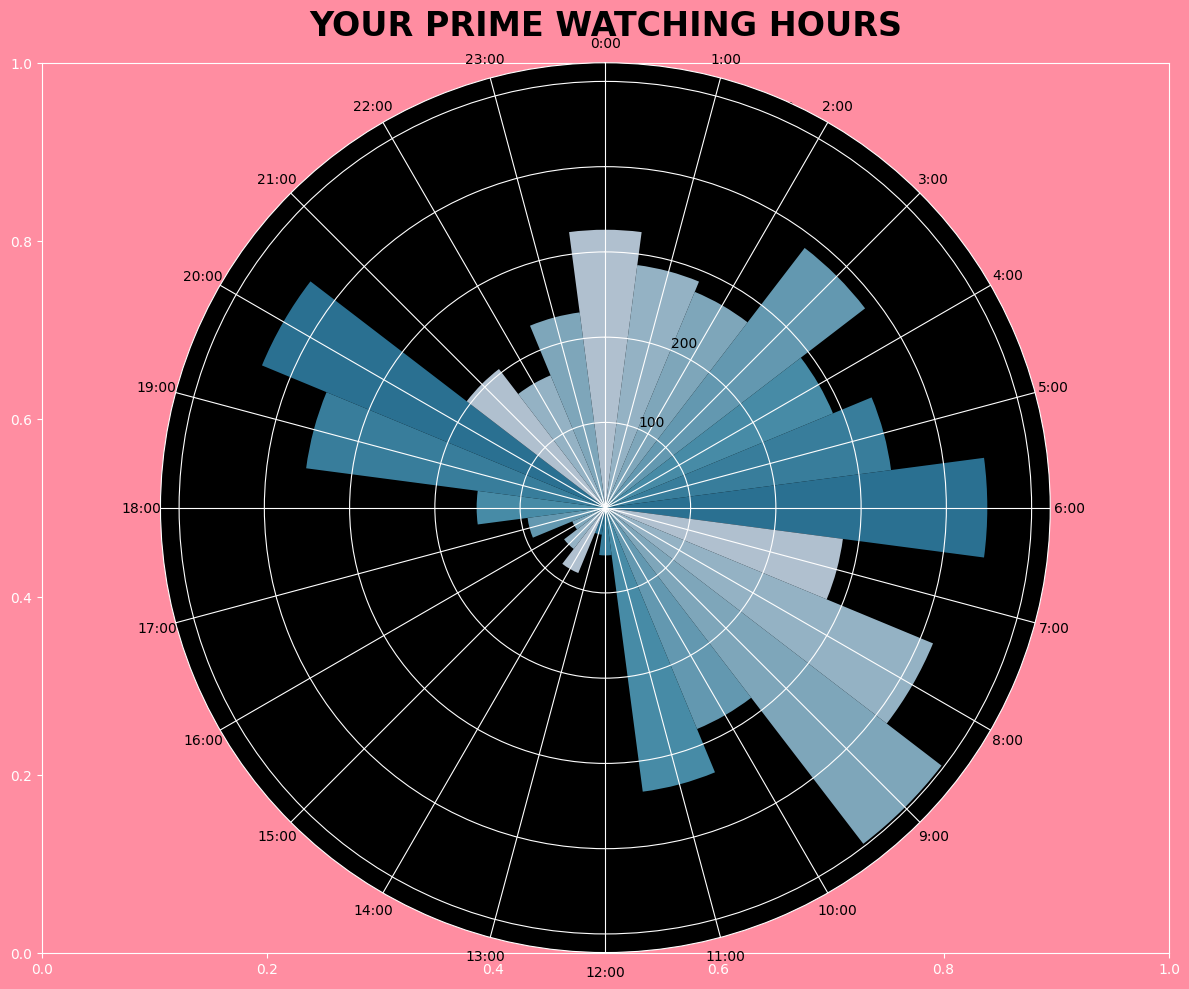

In [ ]:


# VISUALIZATION 1: HOURLY WATCHING PATTERNS
print("\nYOUTUBE HOURLY CHOATIC PATTERNS")

# Create a separate hourly pattern visualization
plt.figure(figsize=(12, 10))

# Set background to pink
plt.gca().set_facecolor(pink)
plt.gcf().set_facecolor(pink)

# Hourly data
hour_counts = df.groupby('hour').size()

# Create a polar plot for the hours
ax = plt.subplot(111, polar=True)
theta = np.linspace(0, 2*np.pi, 24, endpoint=False)
radii = np.zeros(24)

# Fill in the actual hours we have data for
for hour, count in hour_counts.items():
    radii[hour] = count

# Create the polar bars with hydrangea colors
for i, (t, r) in enumerate(zip(theta, radii)):
    color_idx = i % len(hydrangea_colors)
    ax.bar(t, r, width=2*np.pi/24, bottom=0.0, color=hydrangea_colors[color_idx], alpha=0.9)

# Set the direction of the zero hour to the top
ax.set_theta_zero_location("N")
# Set the direction to clockwise
ax.set_theta_direction(-1)

# Set the labels to hours
ax.set_xticks(theta)
ax.set_xticklabels([f"{i}:00" for i in range(24)])
ax.tick_params(colors='black', labelsize=10)

# Add title
plt.title('YOUR PRIME WATCHING HOURS', fontsize=24, fontweight='bold', color='black', pad=20)

# Find peak hours
if not hour_counts.empty:
    peak_hour = hour_counts.idxmax()
    print(f"YOUR WASTE THE MOST TIME DURING: {peak_hour}:00")
else:
    peak_hour = None
    print("Not enough data to determine your prime time")

plt.tight_layout()
plt.show()


### Analyis: YOUTUBE HOURLY CHOATIC PATTERNS
#### Question : What time do i use youtube the most?
According to polar bars, I use it most at 9 am. This makes sense, since its when i usually sleep and therefore there is always some sort of sleep story going on.
This is my favourite visualisation. I feel like it really shows things with a lot more context.

YOUR TOP YOUTUBE DAY: Saturday


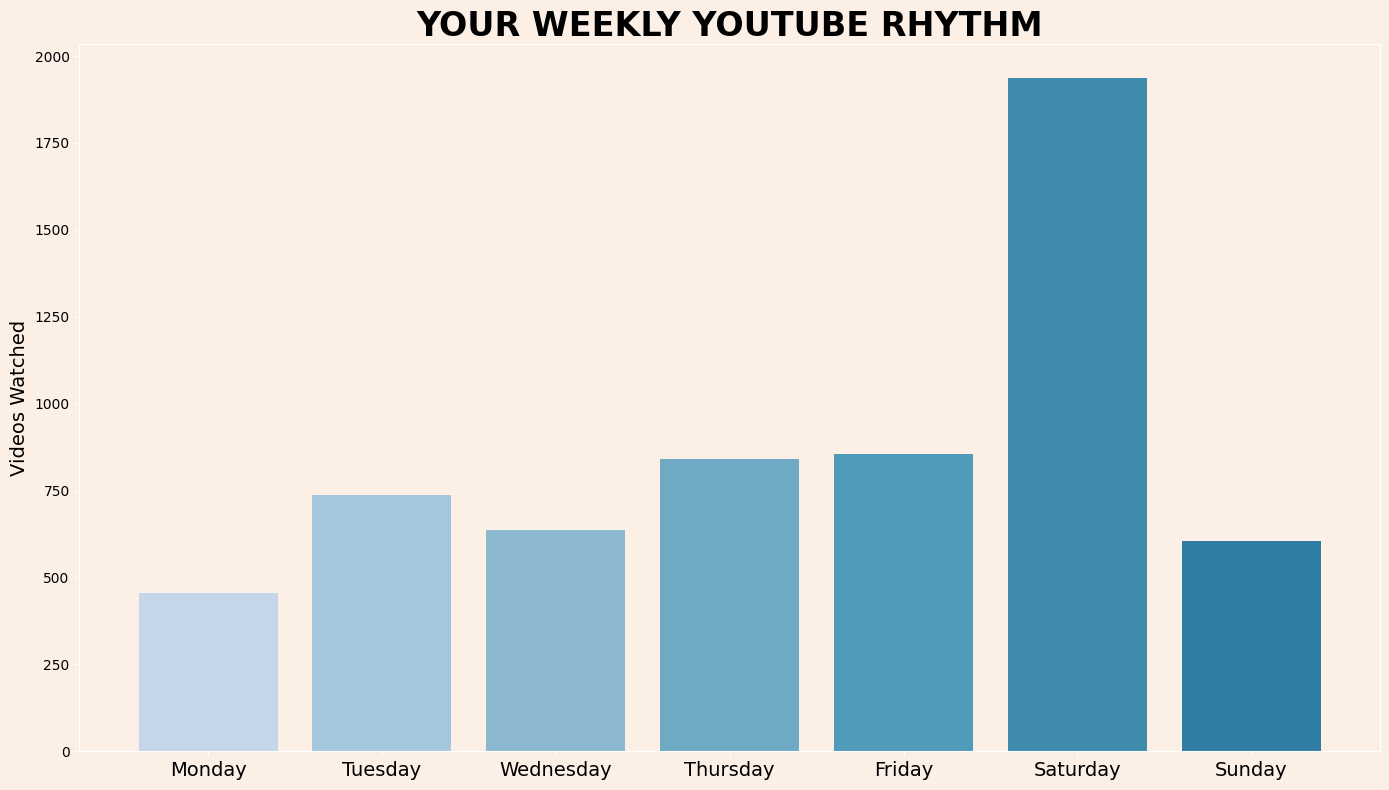

In [ ]:
# VISUALIZATION 2: DAY OF PATTERNS
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor(peach)
plt.gcf().set_facecolor(peach)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts()
day_counts = day_counts.reindex(day_order).fillna(0)  # Fill missing days with 0

# Create bar chart with INSPIRED BY hydrangea colors
x = np.arange(len(day_order))
for i, (day, count) in enumerate(zip(day_order, day_counts)):
    plt.bar(i, count, color=hydrangea_colors[i % len(hydrangea_colors)])

# Styling
plt.title('YOUR WEEKLY YOUTUBE RHYTHM', fontsize=24, fontweight='bold', color='black')
plt.xticks(x, day_counts.index, fontsize=14, color='black')
plt.yticks(color='black')
plt.ylabel('Videos Watched', fontsize=14, color='black')
plt.grid(False)

# Find favorite day
if not day_counts.empty and day_counts.max() > 0:
    favorite_day = day_counts.idxmax()

    print(f"Sarena's TOP YOUTUBE DAY: {favorite_day}")
else:
    favorite_day = None
    print("Not enough data to determine your top YouTube day")

plt.tight_layout()
plt.show()

### Analysis
#### Question: What day do i use youtube the most?
According to this bar graph, I use youtube the most on saturday. This adds up, as its the weekend and youtube is usually playing to whole day in the background.

In [1]:

# VISUALIZATION 3: TOP CREATORS
print("PEOPLE YOU WATCH THE MOST:")

# Create a separate top creators visualization
channel_df = df.dropna(subset=['channel_name'])
if not channel_df.empty:
    channel_counts = channel_df['channel_name'].value_counts().head(10)

    # Create visualization only if there are channels
    if not channel_counts.empty:
        plt.figure(figsize=(14, 10))
        plt.gca().set_facecolor(light_pink)
        plt.gcf().set_facecolor(light_pink)

        # Create horizontal bar chart
        y_pos = np.arange(len(channel_counts.index))

        # Create horizontal bar chart with alternating hydrangea colors
        for i, (channel, count) in enumerate(zip(channel_counts.index, channel_counts.values)):
            plt.barh(y_pos[i], count, color=hydrangea_colors[i % len(hydrangea_colors)], height=0.7)

        # Add channel names
        for i, (channel, count) in enumerate(zip(channel_counts.index, channel_counts.values)):
            # Add channel name
            plt.text(count/2, y_pos[i], channel, ha='center', va='center',
                     fontsize=12, color='black', fontweight='bold')

        # Add count at the end of each bar
        for i, count in enumerate(channel_counts.values):
            plt.text(count + (channel_counts.values.max() * 0.02), y_pos[i],
                     f"{int(count)}", ha='left', va='center', fontsize=12, color='black')

        # Remove y-axis ticks
        plt.yticks([])

        # Set chart limits
        plt.xlim(0, channel_counts.values.max() * 1.1 if len(channel_counts) > 0 else 10)

        # Add title
        plt.title('YOUR TOP CREATORS', fontsize=28, fontweight='bold', color='black', pad=20)
        plt.xlabel('Videos Watched', fontsize=14, color='black')

        # Remove frame
        plt.box(False)
        plt.xticks(color='black')

        # Print top channels
        if len(channel_counts) > 0:
            print(f"YOUR #1 CREATOR: {channel_counts.index[0]}")
            print("\nYOUR TOP 5 CREATORS:")

            # Convert to a list then iterate
            top_channels = list(channel_counts.items())
            for i, item in enumerate(top_channels[:min(5, len(top_channels))], 1):
                channel, count = item
                print(f"   {i}. {channel} - {count} videos")

        plt.tight_layout()
        plt.show()  # Display in Colab rather than saving
    else:
        print("No channel data available to display creators")
        channel_counts = pd.Series()
else:
    print("No channel data available to display creators")
    channel_counts = pd.Series()

PEOPLE YOU WATCH THE MOST:


NameError: name 'df' is not defined

### Analysis of visualisation 3: Top creators
#### Question: What creators/youtube channels do I watch the most
This is interesting. Most of my top creator this year have something to do with fashion which is a recent trend. My cousin is getting married this year, so I've been having to watch a lot of the videos she sends me to figure out her dresses so I feel like now that's all my algorithm gives me


YOUR PEAK MONTH: April


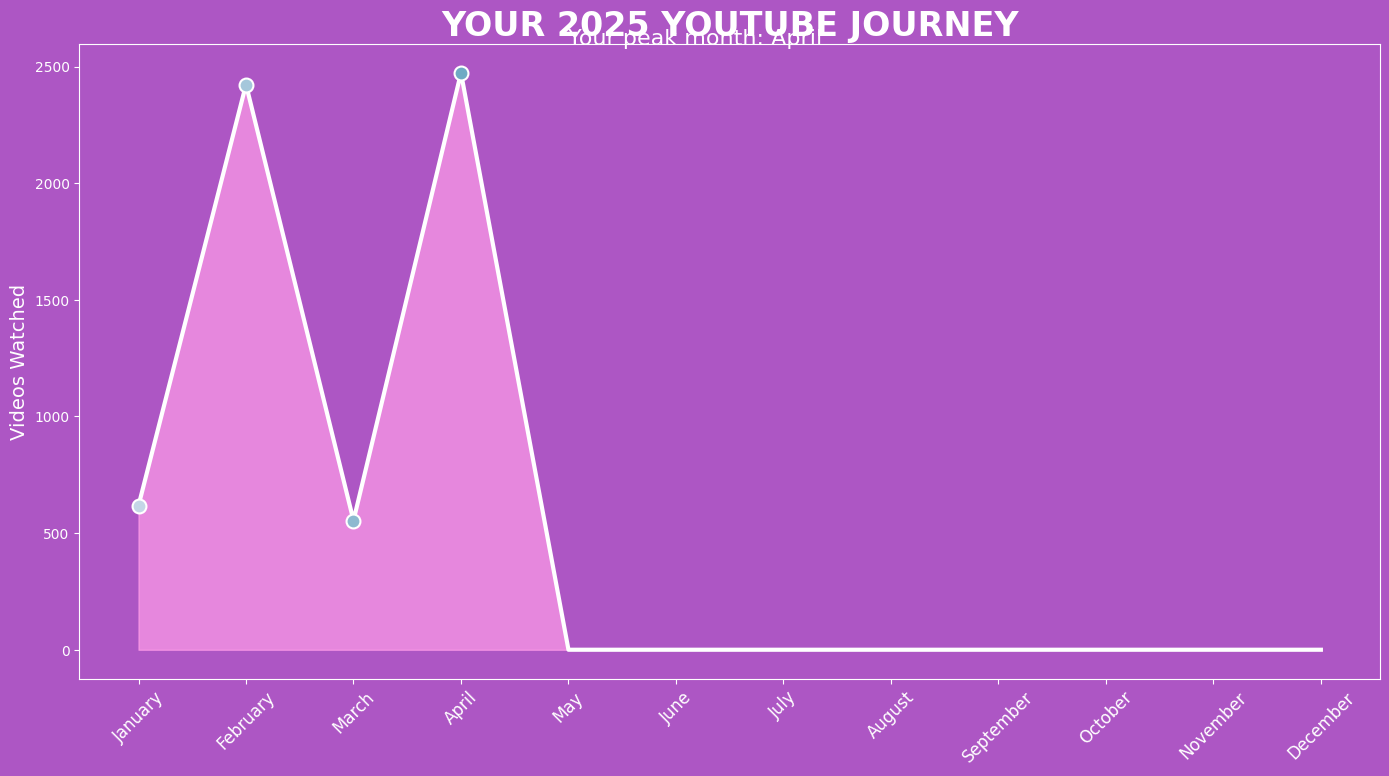

In [ ]:
# VISUALIZATION 4: MONTHLY TRENDS
plt.figure(figsize=(14, 8))
plt.gca().set_facecolor(purple)
plt.gcf().set_facecolor(purple)

# Reorder months chronologically
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts = df.groupby('month').size()
monthly_counts = monthly_counts.reindex(months_order).fillna(0)

# Create area plot with gradient fill
x = np.arange(len(months_order))
plt.plot(x, monthly_counts.values, linewidth=3, color='white')
plt.fill_between(x, monthly_counts.values, color=light_pink, alpha=0.7)

# Add markers for each month
for i, (month, count) in enumerate(zip(monthly_counts.index, monthly_counts.values)):
    if count > 0:
        plt.scatter(i, count, s=100, color=hydrangea_colors[i % len(hydrangea_colors)],
                   edgecolor='white', linewidth=1.5, zorder=3)

# Add month labels
plt.xticks(x, monthly_counts.index, rotation=45, fontsize=12, color='white')
plt.yticks(color='white')

# Styling
plt.title('YOUR 2025 YOUTUBE JOURNEY', fontsize=24, fontweight='bold', color='white')
plt.ylabel('Videos Watched', fontsize=14, color='white')
plt.grid(False)

# Find peak month with safety check
if not monthly_counts.empty and monthly_counts.max() > 0:
    peak_month = monthly_counts.idxmax()
    plt.text(0.5, 0.92, f"Your peak month: {peak_month}",
             ha='center', transform=plt.gcf().transFigure, fontsize=16, color='white')
    print(f"\nYOUR PEAK MONTH: {peak_month}")
else:
    peak_month = None
    print("\nNot enough data to determine your peak month")

plt.tight_layout()
plt.show()  # Display in Colab rather than saving

### Analysis of monthly usage

#### Question: How does my usage vary throughout the year?
Since most of this year isn't here yet, this is harder. But for the four months, it seems that my usage peaked in february which was around ramadan/ spring break when I had a lot of time to waste.

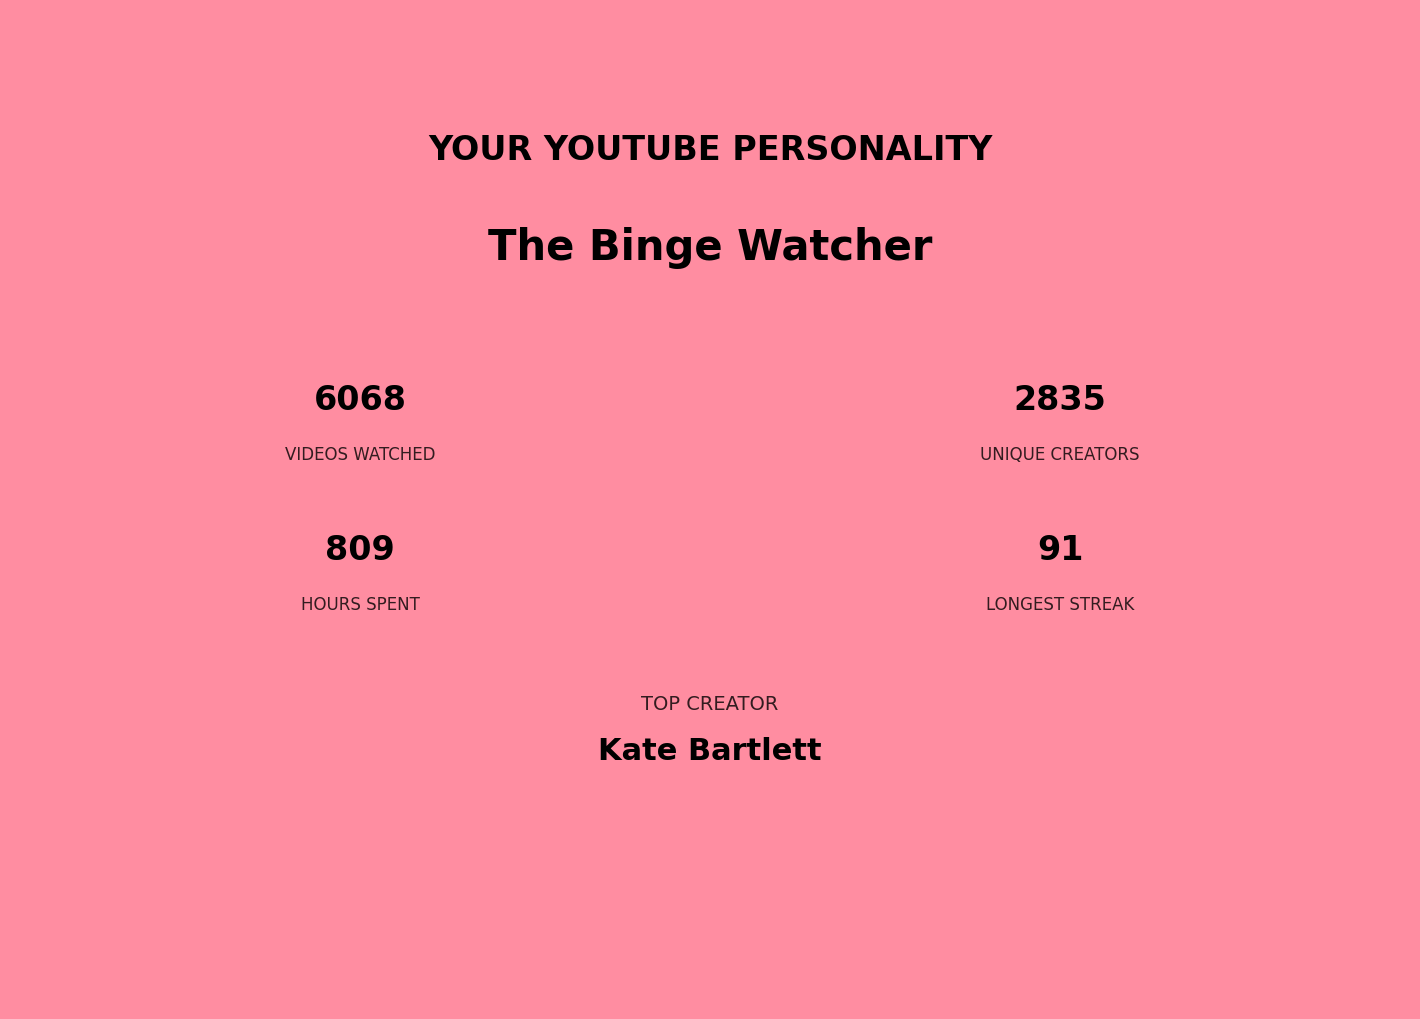


YOUR YOUTUBE PERSONALITY
Based on your viewing habits, you are: The Binge Watcher

All visualizations have been displayed!
YOUR 2025 YOUTUBE WRAPPED IS COMPLETE!


In [ ]:
# VISUALIZATION 5: YOUTUBE PERSONALITY
# Calculate watch statistics
total_videos = len(df)
unique_creators = df['channel_name'].nunique()

# Calculate watch streaks with improved logic
daily_counts = df.groupby('date').size()
if not daily_counts.empty:
    # Convert to consecutive day streaks
    streak_data = (daily_counts > 0).astype(int)
    # Find runs of 1s (days with views)
    streak_groups = (streak_data.diff() != 0).cumsum()
    # Group by the run number
    streaks = streak_groups.groupby(streak_groups).count()
    # Get the maximum streak of days with views
    # FIX: Ensure streaks.index is within the bounds of streak_data
    valid_streak_indices = streaks.index[streaks.index - 1 >= 0]  # Filter indices
    # valid_streak_indices = streaks.index[streaks.index - 1 < len(streak_data)]  # Alternative if your version of pandas require this type of filter
    max_streak = streaks[streak_data.iloc[valid_streak_indices - 1].values == 1].max() if len(valid_streak_indices) > 0 else 0
else:
    max_streak = 0

# Calculate hours spent (rough estimate)
# Assuming average YouTube video is 8 minutes
hours_spent = total_videos * 8 / 60

# Create personality based on patterns
personality = 'The Content Explorer'  # Default

if peak_hour is not None and (peak_hour >= 22 or peak_hour <= 4):
    personality = 'The Night Owl'
elif max_streak >= 14:
    personality = 'The Binge Watcher'
elif total_videos > 0 and unique_creators / total_videos > 0.5:
    personality = 'The Explorer'
elif not channel_counts.empty and total_videos > 0 and channel_counts.iloc[0] / total_videos > 0.2:
    personality = 'The Loyal Fan'
elif favorite_day in ['Saturday', 'Sunday']:
    personality = 'The Weekend Warrior'

# Create a YT personlality background
plt.figure(figsize=(14, 10))
plt.gca().set_facecolor(pink)  # Set the background color to pink
plt.gcf().set_facecolor(pink)  # Set the figure color to pink (may be redundant, but ensures consistency)

plt.text(0.5, 0.85, "YOUR YOUTUBE PERSONALITY", fontsize=24, fontweight='bold',
         ha='center', color='black')

# Add personality in larger text
plt.text(0.5, 0.75, personality, fontsize=30, fontweight='bold',
         ha='center', color='black')

# Add stats using modern, minimalist style
# Create two columns of stats
stats = [
    (0.25, 0.6, f"{total_videos}", "VIDEOS WATCHED"),
    (0.75, 0.6, f"{unique_creators}", "UNIQUE CREATORS"),
    (0.25, 0.45, f"{hours_spent:.0f}", "HOURS SPENT"),
    (0.75, 0.45, f"{max_streak}", "LONGEST STREAK")
]

for x, y, value, label in stats:
    # Value in larger font
    plt.text(x, y, value, fontsize=24, fontweight='bold', ha='center', color='black')
    # Label below in smaller font
    plt.text(x, y-0.05, label, fontsize=12, ha='center', color='black', alpha=0.8)

# Add top creator
if not channel_counts.empty:
    plt.text(0.5, 0.3, "TOP CREATOR", fontsize=14, ha='center', color='black', alpha=0.8)
    plt.text(0.5, 0.25, f"{channel_counts.index[0]}",
             fontsize=22, fontweight='bold', ha='center', color='black')
else:
    plt.text(0.5, 0.3, "TOP CREATOR", fontsize=14, ha='center', color='black', alpha=0.8)
    plt.text(0.5, 0.25, "No data available",
             fontsize=22, fontweight='bold', ha='center', color='black')

# Add hexcodes at the bottom like in the original palette image
    plt.text(i/4 + 1/8, 0.1, hexcode, fontsize=14, ha='center', color='black', alpha=0.7)

# Turn off axis
plt.axis('off')

plt.tight_layout(pad=0)
plt.show()  # Display in Colab rather than saving

print("\nYOUR YOUTUBE PERSONALITY")
print(f"Based on your viewing habits, you are: {personality}")
print("\nAll visualizations have been displayed!")
print("YOUR 2025 YOUTUBE WRAPPED IS COMPLETE!")

# Analysis of Part 4
I feel like without context, this looks really heavy usage, which it is but not in the way that the visualisations seem to depict.

## There are a couple reasons I think this doesnt reflect my usage
*  I use youtube as a music player because I feel like the algorithm is a lot less random so what I listen to often is music I look up manually or youtube suggests pretty well based on my previous liked videos
*   I listen to sleep stories and most of them are more than 3 hours long and often have autoplay on


##Some things it depicted well
*   It shows the recent shift towards more fashion creators
*   I couldnt recognise some of the creators first and upon looking the creators up, i realised they produced shortform content. The fact I couldnt remember even who they were made me realise how unintentional shortform content has made me about my media consumption habits. I have since deleted ig and disabled shorts